In [1]:
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from wrangle import new_zillow_data, get_zillow_data, handle_missing_values, remove_columns, wrangle_zillow, split_data, scale_data




Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.


In [2]:
df = get_zillow_data()


/Users/derekbixby/codeup-data-science/clustering_exercises/wrangle.py:39: DtypeWarning: Columns (67,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('zillow.csv', index_col=0)


In [3]:
df = wrangle_zillow()

/Users/derekbixby/codeup-data-science/clustering_exercises/wrangle.py:173: DtypeWarning: Columns (67,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('zillow.csv')


In [4]:
df.T


,3,4,5,7,8,9,13,14,15,19,...,66027,66028,66029,66030,66031,66032,66033,66035,66036,66037
Unnamed: 0,3,4,5,7,8,9,13,14,15,19,...,66027,66028,66029,66030,66031,66032,66033,66035,66036,66037
parcelid,12177905,10887214,12095076,12790562,11542646,11104527,12045625,11830315,12325145,11671335,...,12892446,12666457,10858613,10722691,12412492,10833991,11000655,12773139,12826780,13083743
bathroomcnt,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,3.00,...,3.00,3.00,2.00,2.00,2.00,3.00,2.00,1.00,2.00,2.00
bedroomcnt,4.00,3.00,4.00,4.00,2.00,4.00,3.00,2.00,3.00,2.00,...,4.00,3.00,2.00,3.00,4.00,3.00,2.00,3.00,3.00,3.00
calculatedfinishedsquarefeet,"2,376.00","1,312.00","2,962.00","3,039.00","1,290.00","2,540.00","1,435.00","1,146.00","1,092.00","2,126.00",...,"2,068.00","2,200.00","1,261.00","1,570.00","1,633.00","1,741.00","1,286.00","1,032.00","1,762.00","1,050.00"
fips,"6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00",...,"6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00","6,037.00"
latitude,"34,245,180.00","34,185,120.00","34,145,202.00","33,960,230.00","33,998,800.00","34,434,971.00","34,212,400.00","34,024,040.00","33,897,676.00","34,074,859.00",...,"34,075,094.00","33,825,211.00","34,148,100.00","34,194,943.00","33,870,815.00","34,202,400.00","34,245,368.00","34,040,895.00","33,937,685.00","34,010,864.00"
longitude,"-118,240,722.00","-118,414,640.00","-118,179,824.00","-118,006,914.00","-118,416,000.00","-118,464,390.00","-118,238,000.00","-118,159,090.00","-118,169,106.00","-118,563,050.00",...,"-117,773,759.00","-118,388,099.00","-118,442,000.00","-118,629,218.00","-118,070,858.00","-118,502,000.00","-118,282,383.00","-118,038,169.00","-117,996,709.00","-117,900,894.00"
lotsizesquarefeet,"13,038.00","278,581.00","63,000.00","20,028.00","54,048.00","10,384.00","45,171.00","4,657.00","36,005.00","221,601.00",...,"7,333.00","7,503.00","57,110.00","7,499.00","4,630.00","59,487.00","47,405.00","5,074.00","6,347.00","5,927.00"
rawcensustractandblock,"60,373,001.00","60,371,236.01","60,374,608.00","60,375,002.02","60,372,751.02","60,379,200.34","60,373,006.00","60,375,316.04","60,375,536.01","60,372,626.01",...,"60,374,022.00","60,376,213.26","60,371,412.02","60,371,352.01","60,375,548.02","60,371,319.00","60,371,014.00","60,374,338.02","60,375,034.02","60,374,081.40"


In [5]:
train, validate, test = split_data(df)
train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,landtaxvaluedollarcnt,taxamount,id.1,parcelid.1,logerror,transactiondate,heatingorsystemtypeid.1,propertylandusetypeid.1,parcelid.2,county
13643,13643,11459500,2.00,3.00,"1,848.00","6,037.00","33,968,442.00","-118,407,534.00","5,731.00","60,372,764.00",...,"761,907.00","11,589.53",16136,11459500,0.01,2017-03-10,7.00,261,11459500,Los_Angeles
43974,43974,12619811,3.00,2.00,"1,135.00","6,037.00","33,818,688.00","-118,288,517.00","46,660.00","60,375,436.02",...,"109,223.00","3,247.02",51718,12619811,-0.11,2017-06-28,7.00,266,12619811,Los_Angeles
39168,39168,11121122,3.00,4.00,"2,415.00","6,037.00","34,430,217.00","-118,559,333.00","4,730.00","60,379,201.14",...,"262,000.00","8,737.94",46129,11121122,0.00,2017-06-14,2.00,261,11121122,Los_Angeles
38185,38185,11197600,2.00,3.00,"1,125.00","6,037.00","34,562,270.00","-118,120,518.00","7,219.00","60,379,104.04",...,"45,960.00","2,068.16",44971,11197600,-0.08,2017-06-09,2.00,261,11197600,Los_Angeles
56422,56422,11344895,3.00,4.00,"2,214.00","6,037.00","34,469,992.00","-118,530,343.00","5,833.00","60,379,200.15",...,"132,841.00","6,618.88",66399,11344895,-0.03,2017-08-14,2.00,261,11344895,Los_Angeles


In [6]:
df.shape

(43962, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43962 entries, 3 to 66037
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    43962 non-null  int64  
 1   parcelid                      43962 non-null  int64  
 2   bathroomcnt                   43962 non-null  float64
 3   bedroomcnt                    43962 non-null  float64
 4   calculatedfinishedsquarefeet  43962 non-null  float64
 5   fips                          43962 non-null  float64
 6   latitude                      43962 non-null  float64
 7   longitude                     43962 non-null  float64
 8   lotsizesquarefeet             43962 non-null  float64
 9   rawcensustractandblock        43962 non-null  float64
 10  regionidcity                  43962 non-null  float64
 11  regionidcounty                43962 non-null  float64
 12  regionidzip                   43962 non-null  float64
 13  r

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,"43,962.00","33,016.89","19,209.53",3.00,"16,272.25","32,943.00","49,606.25","66,037.00"
parcelid,"43,962.00","11,882,284.29","764,773.38","10,711,855.00","11,192,624.50","11,867,244.50","12,527,964.00","14,532,056.00"
bathroomcnt,"43,962.00",2.20,0.94,1.00,2.00,2.00,3.00,10.00
bedroomcnt,"43,962.00",2.95,0.98,1.00,2.00,3.00,4.00,11.00
calculatedfinishedsquarefeet,"43,962.00","1,666.58",837.01,360.00,"1,136.00","1,455.00","1,942.00","12,039.00"
fips,"43,962.00","6,037.28",2.48,"6,037.00","6,037.00","6,037.00","6,037.00","6,059.00"
latitude,"43,962.00","34,100,514.53","224,089.64","33,339,527.00","33,948,924.25","34,085,900.00","34,189,397.00","34,818,767.00"
longitude,"43,962.00","-118,252,330.07","219,271.66","-118,895,075.00","-118,418,138.50","-118,270,641.00","-118,108,042.25","-117,577,285.00"
lotsizesquarefeet,"43,962.00","37,370.82","118,802.64",480.00,"6,061.00","7,523.00","16,509.75","3,589,145.00"
rawcensustractandblock,"43,962.00","60,377,223.27","24,539.56","60,371,011.10","60,372,199.02","60,374,305.03","60,376,005.02","60,591,106.07"


#### Q 1 What are the distributions of the variables in the dataset? 

In [9]:
df.columns


Index(['Unnamed: 0', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'id.1', 'parcelid.1', 'logerror',
       'transactiondate', 'heatingorsystemtypeid.1', 'propertylandusetypeid.1',
       'parcelid.2', 'county'],
      dtype='object')

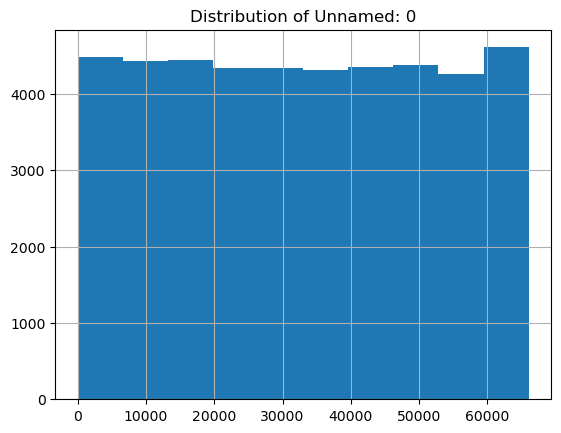

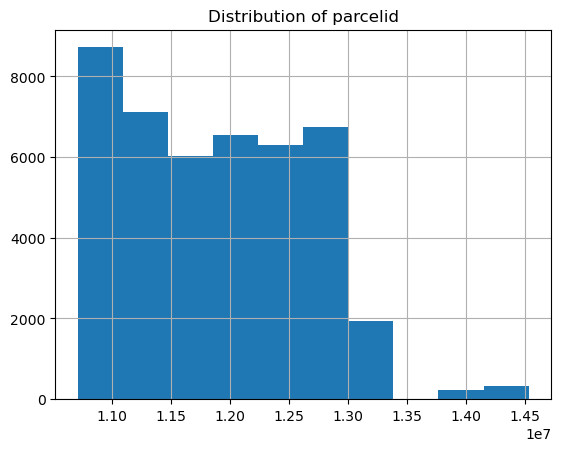

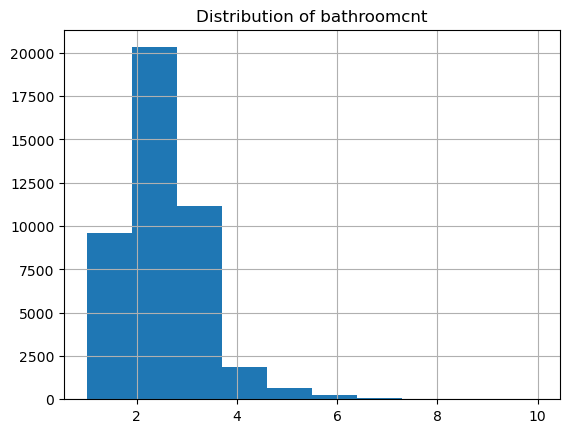

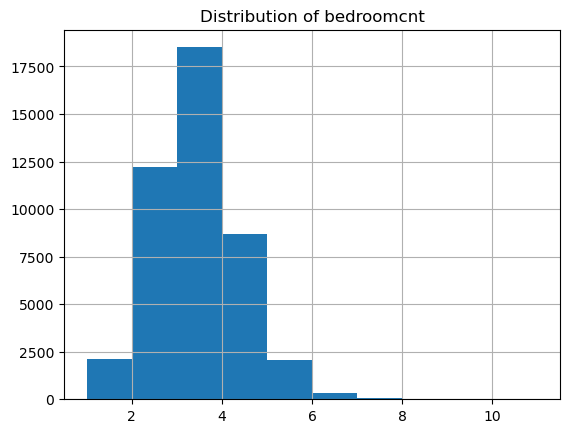

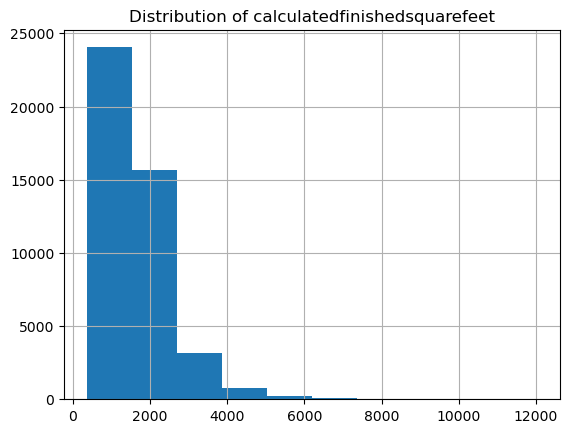

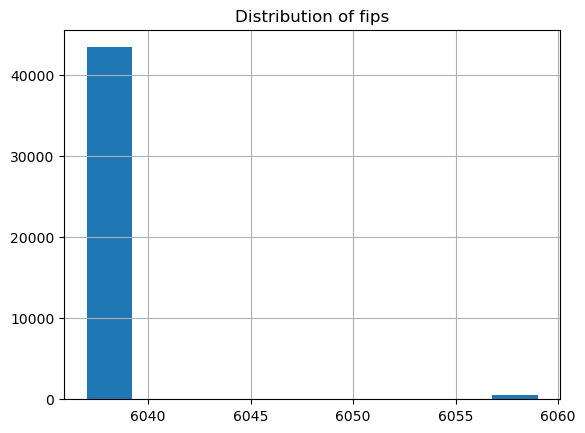

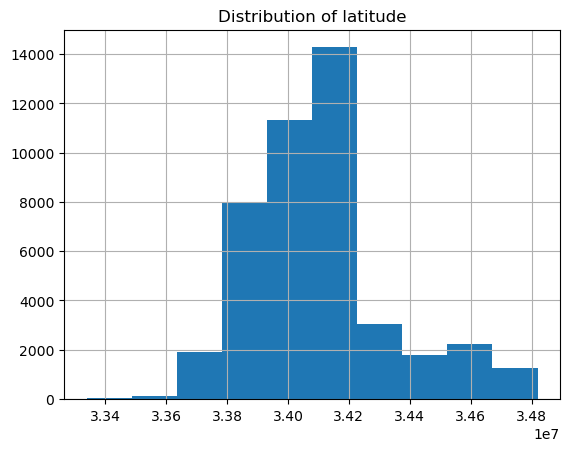

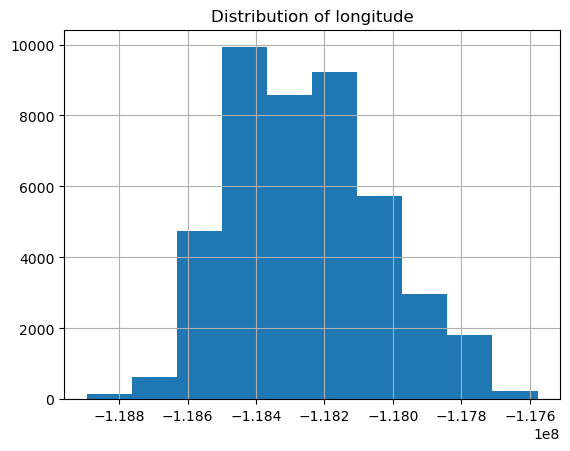

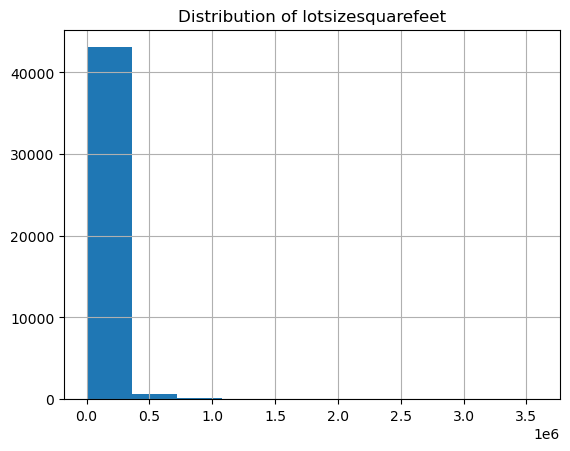

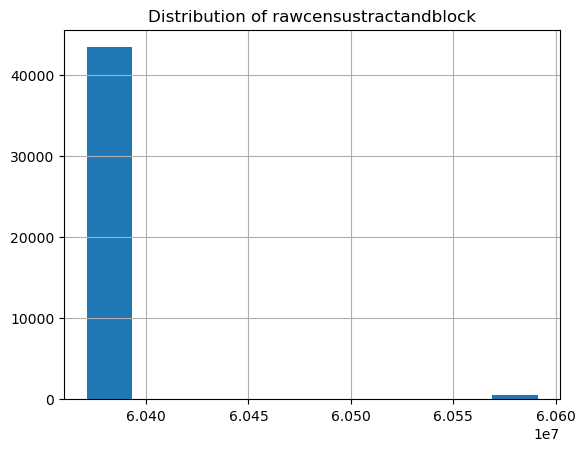

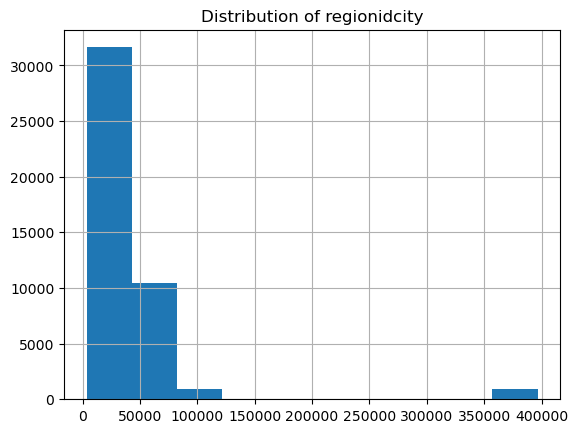

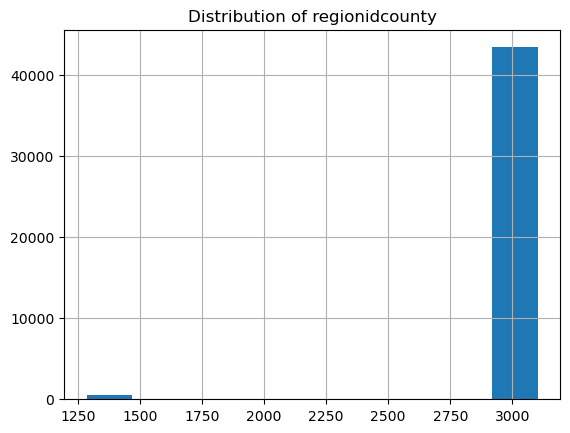

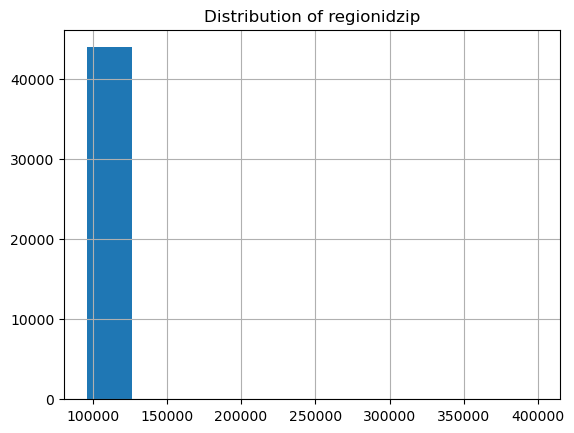

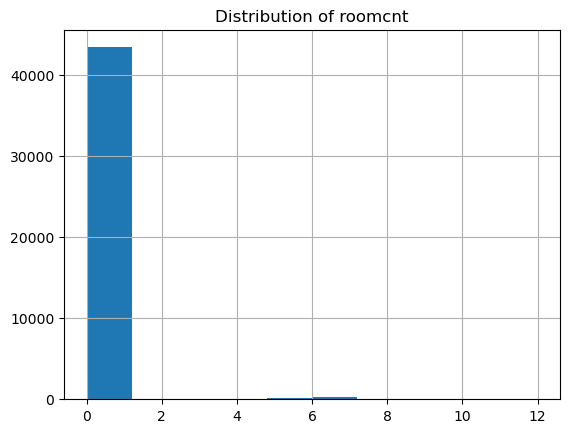

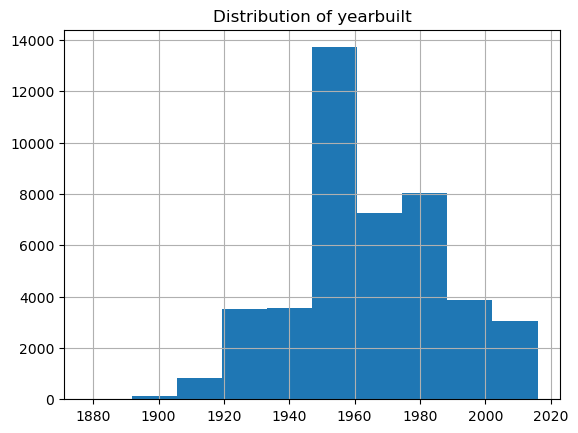

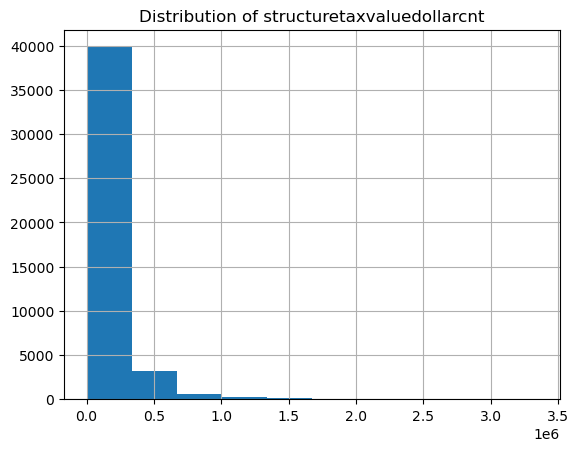

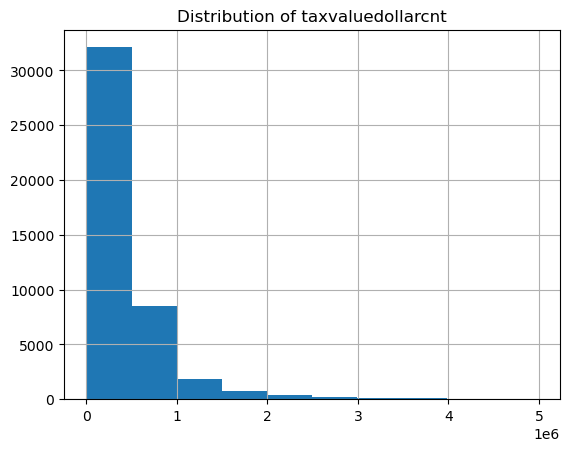

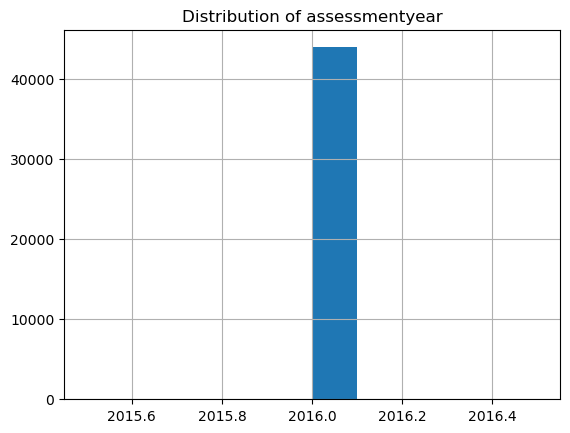

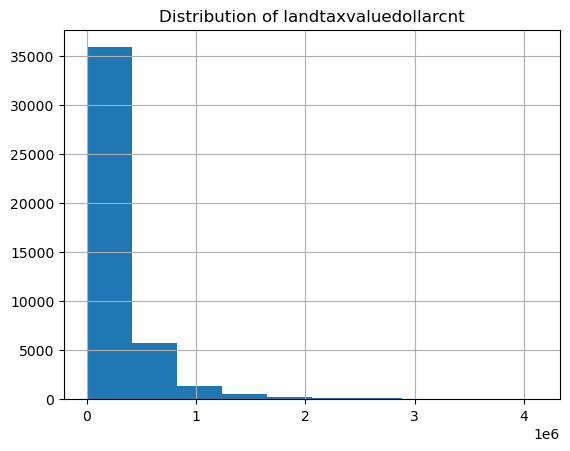

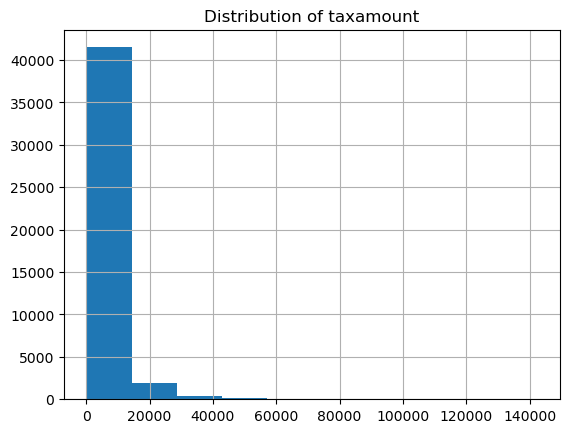

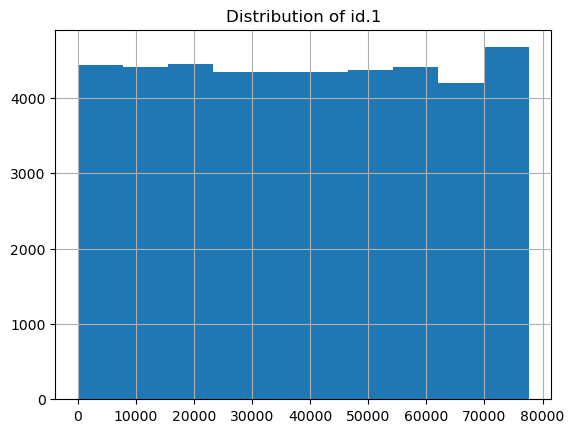

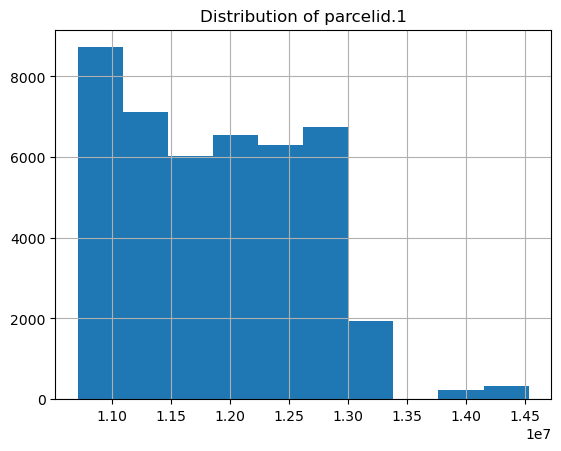

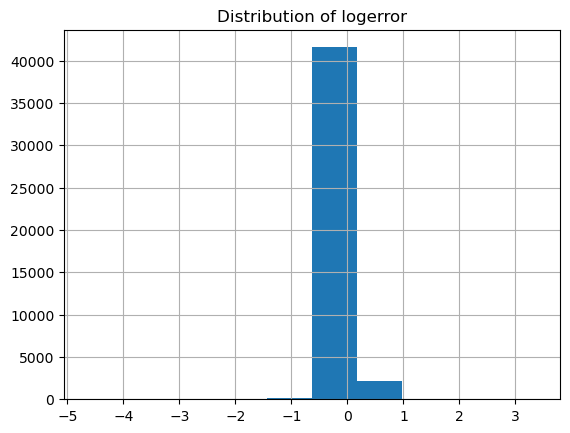

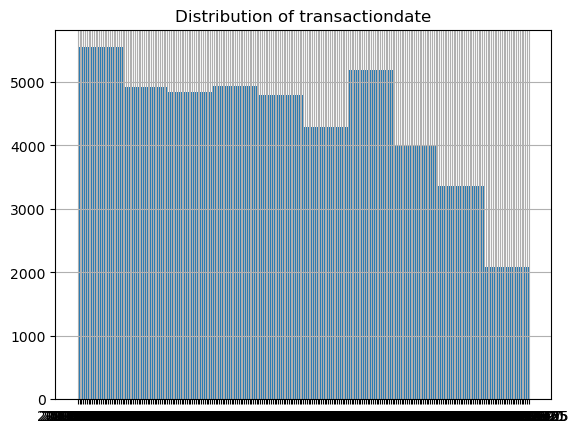

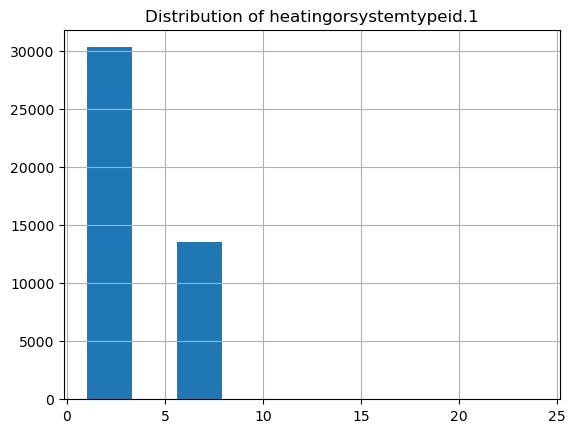

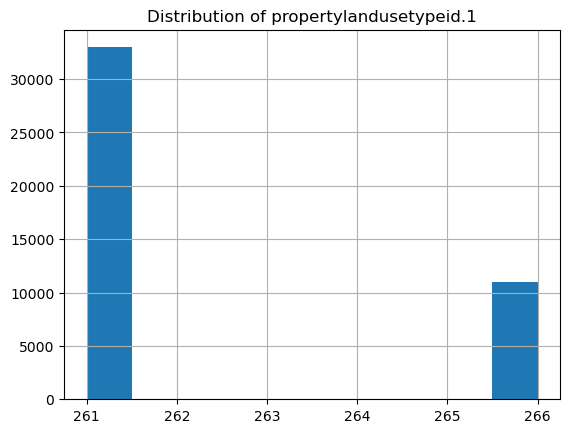

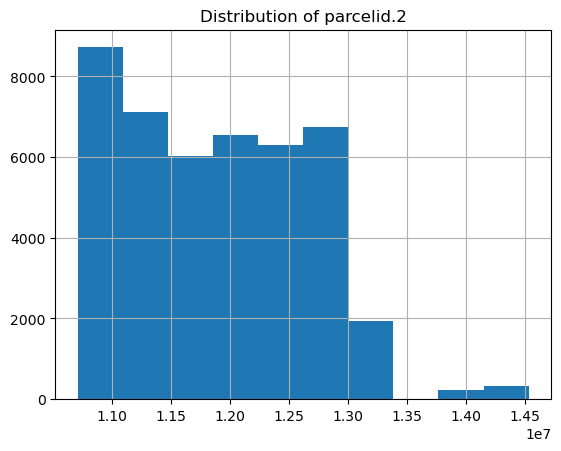

In [10]:
for col in df.columns[:-1]:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

##### Takeaways

- year built seems somewhat normally distributed, might be worth binning to control for different time periods to analyze difference
- Might be worth examining lot size and finished square feet as distributions appear similar
- bedrooms seem to have a higher mean than bathrooms. Makes sense
- Tax value vs square footage
- Tax value and lot size
- 

#### Q 2 How are lot size and square footage related?

2 continuous variables

(0.0, 300000.0)

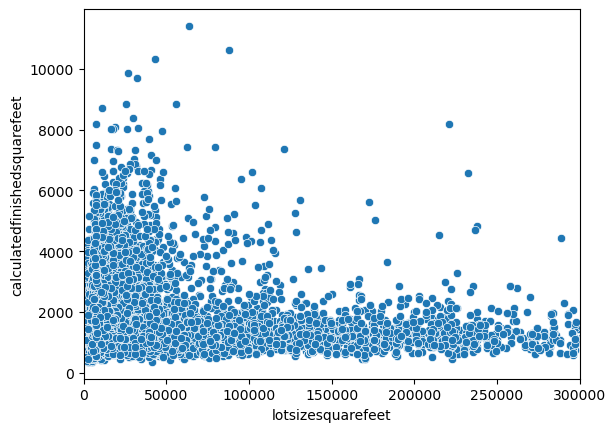

In [11]:
sns.scatterplot(data=train, x='lotsizesquarefeet', y='calculatedfinishedsquarefeet')
plt.xlim(0,300000)

-These seem to be related
-Hard to tell if there are clusters here due to the density of the data

Ho: there is no linear correlation between square footage and lot size
Ha: there is a linear correlation between square footage and lot size

In [12]:
stats.spearmanr(train.calculatedfinishedsquarefeet, train.lotsizesquarefeet)

SignificanceResult(statistic=0.10586440650495917, pvalue=1.3130077575648084e-66)

We reject the null hypothesis, but the correlation here is weak. 

#### Q 3 Is there a relationship between tax value and lot size? 

(0.0, 2000000.0)

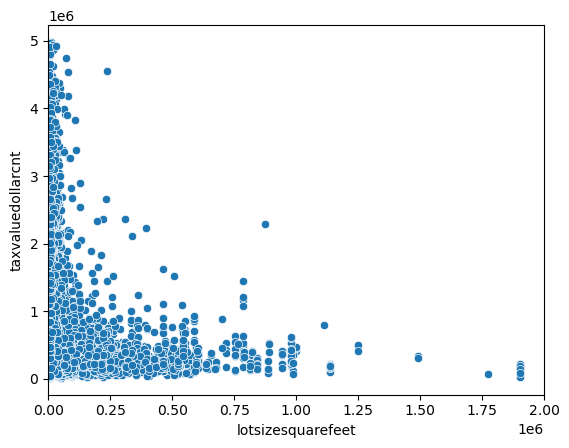

In [13]:
sns.scatterplot(data=train, x='lotsizesquarefeet', y='taxvaluedollarcnt')
plt.xlim(0, 2000000)

as square footage goes up, value seems to go down on average

Ho: there is no linear correlation between lot size and tax value
Ha: there is a linear correlation between lot size and tax value

In [14]:
stats.spearmanr(train.taxvaluedollarcnt, train.lotsizesquarefeet)

SignificanceResult(statistic=0.08128673780648128, pvalue=6.481789171641743e-40)

Again, a statistically significant result, but not a strong correlation. Let's check square feet next

#### Q 4 Is there a relationship between tax value and square footage? 

<Axes: xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

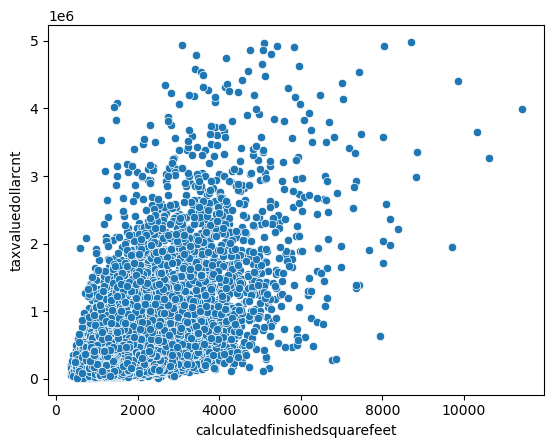

In [15]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt')


definitely a relationship here. Let's test it

Ho: there is no linear correlation between square footage and tax value
Ha: there is a linear correlation between square footage and tax value

In [16]:
stats.spearmanr(train.taxvaluedollarcnt, train.calculatedfinishedsquarefeet)

SignificanceResult(statistic=0.4381311755041464, pvalue=0.0)

#### Q 5 What is the relationship between value and logerror and year built?

<Axes: xlabel='yearbuilt', ylabel='Count'>

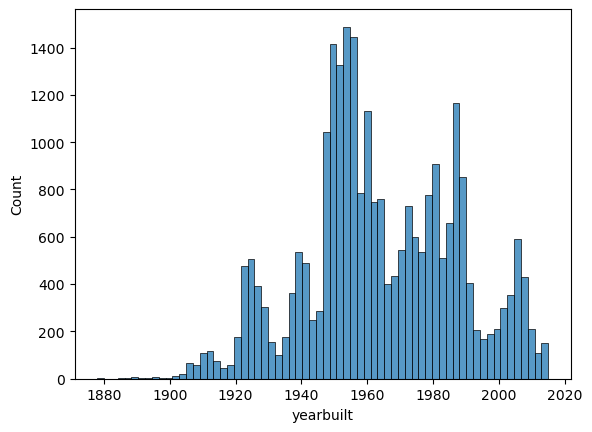

In [17]:
sns.histplot(data=train, x='yearbuilt')

In [18]:
train['year_bins'] = pd.cut(train.yearbuilt,[1900,1940,1980, 2016], labels=['1900_1940', '1941_1980', '1981_2016'])


In [19]:
train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,taxamount,id.1,parcelid.1,logerror,transactiondate,heatingorsystemtypeid.1,propertylandusetypeid.1,parcelid.2,county,year_bins
13643,13643,11459500,2.00,3.00,"1,848.00","6,037.00","33,968,442.00","-118,407,534.00","5,731.00","60,372,764.00",...,"11,589.53",16136,11459500,0.01,2017-03-10,7.00,261,11459500,Los_Angeles,1941_1980
43974,43974,12619811,3.00,2.00,"1,135.00","6,037.00","33,818,688.00","-118,288,517.00","46,660.00","60,375,436.02",...,"3,247.02",51718,12619811,-0.11,2017-06-28,7.00,266,12619811,Los_Angeles,1941_1980
39168,39168,11121122,3.00,4.00,"2,415.00","6,037.00","34,430,217.00","-118,559,333.00","4,730.00","60,379,201.14",...,"8,737.94",46129,11121122,0.00,2017-06-14,2.00,261,11121122,Los_Angeles,1981_2016
38185,38185,11197600,2.00,3.00,"1,125.00","6,037.00","34,562,270.00","-118,120,518.00","7,219.00","60,379,104.04",...,"2,068.16",44971,11197600,-0.08,2017-06-09,2.00,261,11197600,Los_Angeles,1941_1980
56422,56422,11344895,3.00,4.00,"2,214.00","6,037.00","34,469,992.00","-118,530,343.00","5,833.00","60,379,200.15",...,"6,618.88",66399,11344895,-0.03,2017-08-14,2.00,261,11344895,Los_Angeles,1981_2016


<Axes: xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

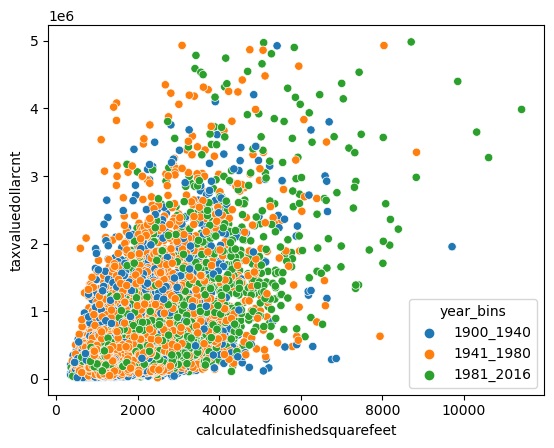

In [20]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue='year_bins')

<Axes: xlabel='year_bins', ylabel='taxvaluedollarcnt'>

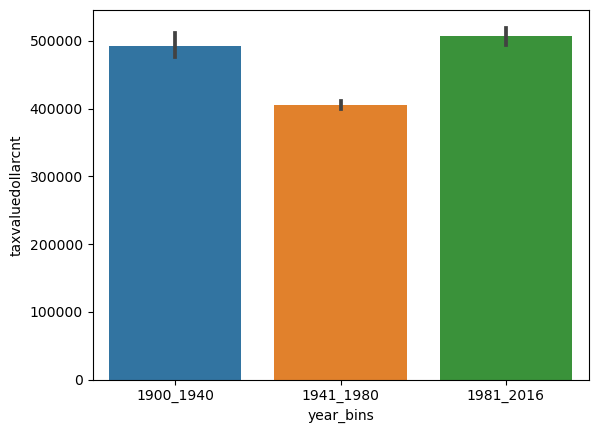

In [21]:
sns.barplot(data=train, x='year_bins', y='taxvaluedollarcnt')

(0.0, 1500000.0)

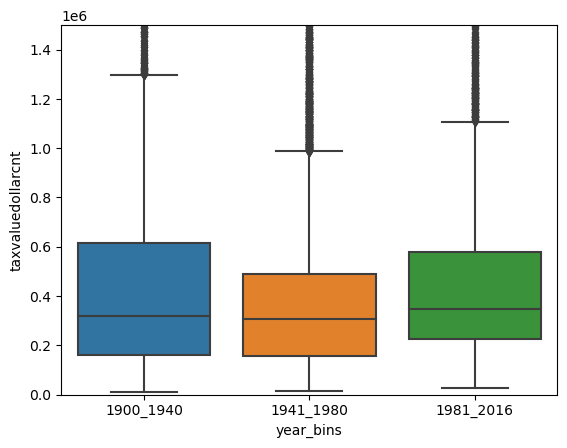

In [22]:
sns.boxplot(data=train, x='year_bins', y='taxvaluedollarcnt')
plt.ylim(0, 1500000)

Buildings from the mid 20th century seem to be worth less on average

<Axes: xlabel='year_bins', ylabel='logerror'>

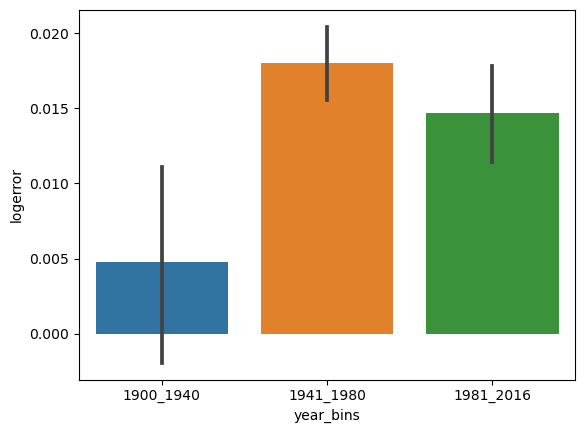

In [23]:
sns.barplot(data=train, x='year_bins', y='logerror')

(-0.3, 0.3)

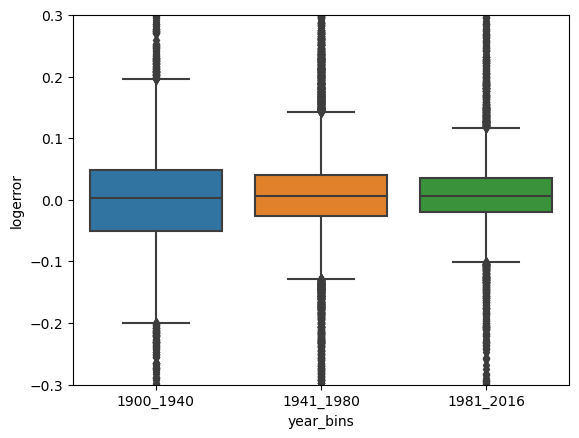

In [24]:
sns.boxplot(data=train, x='year_bins', y='logerror')
plt.ylim(-.3, .3)

log error seems to be highest in mid 20th century and VERY low in early 20th century